<a href="https://colab.research.google.com/github/la2015-hw/Group_10/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 10 F20DL CW1

### Mounting Google Drive to access the dataset.
### The Galaxy Zoo 2 **Table 5** catalog (`zoo2MainSpecz.csv`) contains galaxy classifications, including votes and derived features.  


In [19]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Importing dataset using **pandas** for further exploration and analysis.

In [20]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/zoo2MainSpecz.csv')
df.head()

,specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
0,1.802675e+18,NaN,588017703996096547,160.99040,11.703790,10:43:57.70,+11:42:13.6,original,SBb?t,44,...,0.225,0.225,0.225,0,10,10.0,0.250,0.250,0.250,0
1,1.992984e+18,NaN,587738569780428805,192.41083,15.164207,12:49:38.60,+15:09:51.1,original,Ser,45,...,0.000,0.000,0.000,0,0,0.0,0.000,0.000,0.000,0
2,1.489569e+18,NaN,587735695913320507,210.80220,54.348953,14:03:12.53,+54:20:56.2,original,Sc+t,46,...,0.651,0.651,0.651,0,3,3.0,0.070,0.070,0.070,0
3,2.924084e+18,1.237668e+18,587742775634624545,185.30342,18.382704,12:21:12.82,+18:22:57.7,original,SBc(r),45,...,0.071,0.071,0.071,0,6,6.0,0.429,0.429,0.429,0
4,1.387165e+18,1.237658e+18,587732769983889439,187.36679,8.749928,12:29:28.03,+08:44:59.7,extra,Ser,49,...,0.000,0.000,0.000,0,1,1.0,1.000,1.000,1.000,0


###After the dataset is loaded we check for the dimentions(rows and columns) to see how big the dataset is.

In [21]:
print("Shape:", df.shape)

Shape: (243500, 233)


In [22]:
df.describe()

,specobjid,dr8objid,dr7objid,ra,dec,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,...,t11_arms_number_a36_more_than_4_fraction,t11_arms_number_a36_more_than_4_weighted_fraction,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a36_more_than_4_flag,t11_arms_number_a37_cant_tell_count,t11_arms_number_a37_cant_tell_weight,t11_arms_number_a37_cant_tell_fraction,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,t11_arms_number_a37_cant_tell_flag
count,2.434860e+05,2.397480e+05,2.435000e+05,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,...,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000,243500.000000
mean,1.705785e+18,1.237661e+18,5.878182e+17,185.421271,26.057549,42.610361,179.378706,27.566645,27.439965,0.637958,...,0.017238,0.016842,0.019140,0.000127,1.760990,1.758565,0.263594,0.262473,0.262771,0.006435
std,8.225568e+17,5.449752e+12,1.824223e+14,47.711322,18.229201,5.841532,60.937522,13.274489,13.256767,0.285329,...,0.099019,0.097298,0.104226,0.011282,3.295369,3.293625,0.364121,0.363527,0.364002,0.079962
min,-9.999000e+03,1.237649e+18,5.877230e+17,0.006464,-3.743851,16.000000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.019059e+18,1.237657e+18,5.877327e+17,154.465338,10.607861,39.000000,140.000000,18.000000,18.000000,0.452000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.781203e+18,1.237662e+18,5.877393e+17,185.905845,24.761305,43.000000,157.000000,32.000000,32.000000,0.757000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.382500e+18,1.237665e+18,5.877449e+17,219.726875,39.704970,46.000000,197.000000,38.000000,38.000000,0.861000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.000000
max,3.383502e+18,1.237675e+18,5.888489e+17,359.988830,70.133220,79.000000,604.000000,68.000000,66.281000,1.000000,...,1.000000,1.000000,1.000000,1.000000,37.000000,37.000000,1.000000,1.000000,1.000000,1.000000


### We are checking for **missing and null** values to see which columns need cleaning.

In [23]:
print(df.isna().sum().sort_values(ascending=False).head(20))

dr8objid                                                3752
specobjid                                                 14
dr7objid                                                   0
ra                                                         0
dec                                                        0
rastring                                                   0
decstring                                                  0
sample                                                     0
gz2class                                                   0
total_classifications                                      0
total_votes                                                0
t01_smooth_or_features_a01_smooth_count                    0
t01_smooth_or_features_a01_smooth_weight                   0
t01_smooth_or_features_a01_smooth_fraction                 0
t01_smooth_or_features_a01_smooth_weighted_fraction        0
t01_smooth_or_features_a01_smooth_debiased                 0
t01_smooth_or_features_a

In [34]:
df = df.dropna()

In [35]:
print("New shape:", df.shape)
print(df.isna().sum().sum(), "missing values remaining")

New shape: (239734, 233)
0 missing values remaining


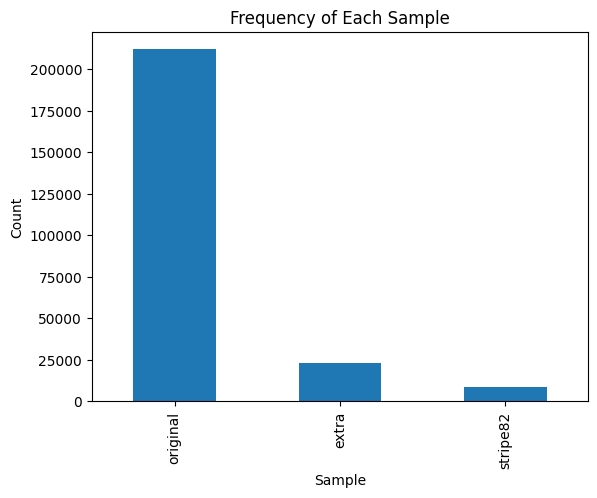

In [25]:
import matplotlib.pyplot as plt

df['sample'].value_counts().plot(kind='bar')

plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Frequency of Each Sample')
plt.show()

original = main galaxies from galaxyZoo 1


extra = added galaxies


stripe82 = Galaxies from the SDSS Stripe 82 region, a specific area of the sky that was imaged repeatedly for deeper observations.

In [26]:
df_selected = df[[
    "specobjid",
    "sample",
    "gz2class",
    "total_classifications",
    "total_votes",
    "t01_smooth_or_features_a01_smooth_count",
    "t01_smooth_or_features_a01_smooth_weight",
    "t01_smooth_or_features_a01_smooth_fraction",
    "t01_smooth_or_features_a01_smooth_weighted_fraction",
    "t01_smooth_or_features_a01_smooth_debiased",
    "t01_smooth_or_features_a01_smooth_flag"
]]

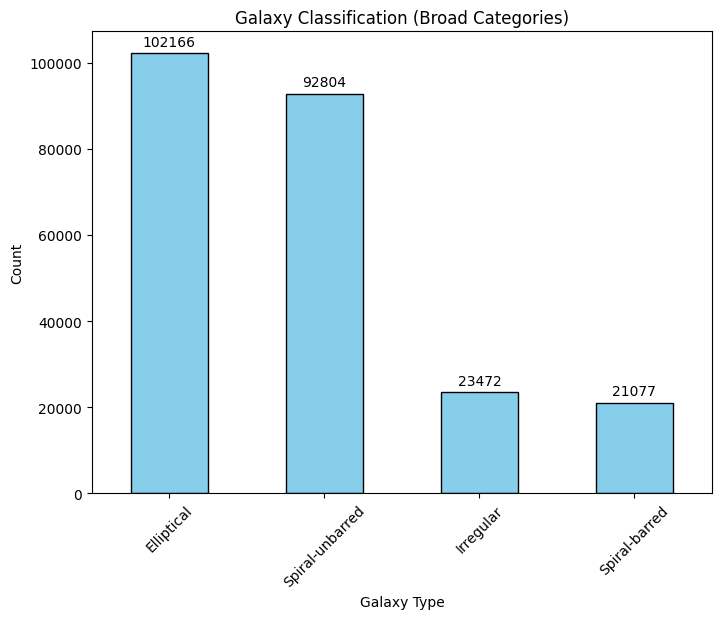

In [40]:
# mapping dictionary
mapping = {
    "E": "Elliptical",
    "S": "Spiral-unbarred",
    "SB": "Spiral-barred",
    "Ir": "Irregular",
    "A": "Artifact"
}

# function to classify each galaxy
def classify_galaxy(gz2class):
    if gz2class.startswith("E"):
        return mapping["E"]
    elif gz2class.startswith("Sa") or gz2class.startswith("Sb") or gz2class.startswith("Sc") or gz2class.startswith("Sd"):
        return mapping["S"]
    elif gz2class.startswith("SBa") or gz2class.startswith("SBb") or gz2class.startswith("SBc") or gz2class.startswith("SBd"):
        return mapping["SB"]
    elif gz2class.startswith("Sen") or gz2class.startswith("Seb") or gz2class.startswith("Ser"):
        return mapping["Ir"]
    elif gz2class == "A":
        return mapping["A"]
    else:
        return "Other"


# apply classification
df["broad_class"] = df["gz2class"].apply(classify_galaxy)

class_counts = df[df["broad_class"] != "Artifact"]["broad_class"].value_counts()

# plot
plt.figure(figsize=(8,6))
bars = class_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Galaxy Classification (Broad Categories)")
plt.xlabel("Galaxy Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# add counts above bars
for i, count in enumerate(class_counts.values):
    plt.text(i, count + (0.01 * max(class_counts.values)), str(count), ha='center', va='bottom')

plt.show()


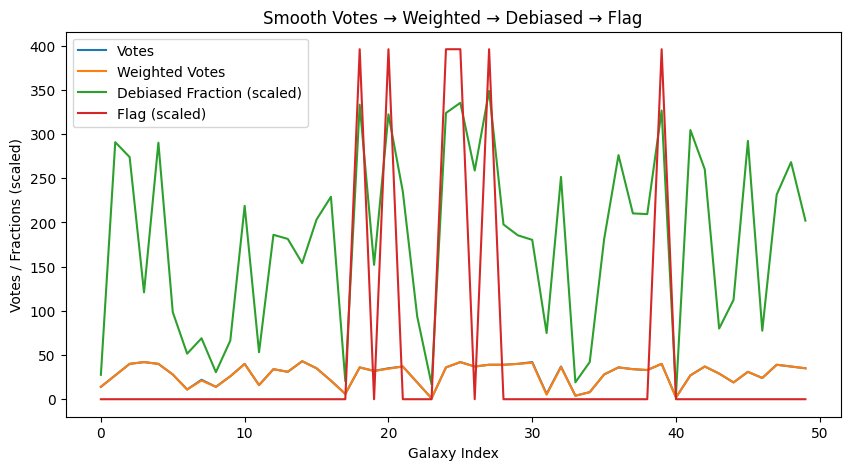

In [42]:

df_sample = df_selected.sample(50, random_state=1)

plt.figure(figsize=(10,5))

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_count'].values, label='Votes')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_weight'].values, label='Weighted Votes')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_debiased'].values * df_sample['total_votes'].max(),
         label='Debiased Fraction (scaled)')

plt.plot(df_sample['t01_smooth_or_features_a01_smooth_flag'].values * df_sample['total_votes'].max(),
         label='Flag (scaled)')

plt.xlabel('Galaxy Index')
plt.ylabel('Votes / Fractions (scaled)')
plt.title('Smooth Votes → Weighted → Debiased → Flag')
plt.legend()
plt.show()


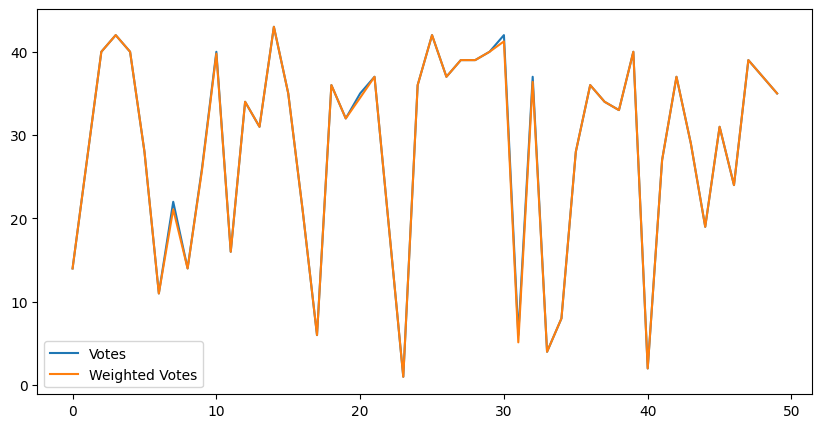

In [43]:
df_sample = df_selected.sample(50, random_state=1)  # 50 random galaxies

plt.figure(figsize=(10,5))

# Plot raw counts
plt.plot(df_sample['t01_smooth_or_features_a01_smooth_count'].values, label='Votes')

# Plot weighted counts
plt.plot(df_sample['t01_smooth_or_features_a01_smooth_weight'].values, label='Weighted Votes')
plt.legend()
plt.show()

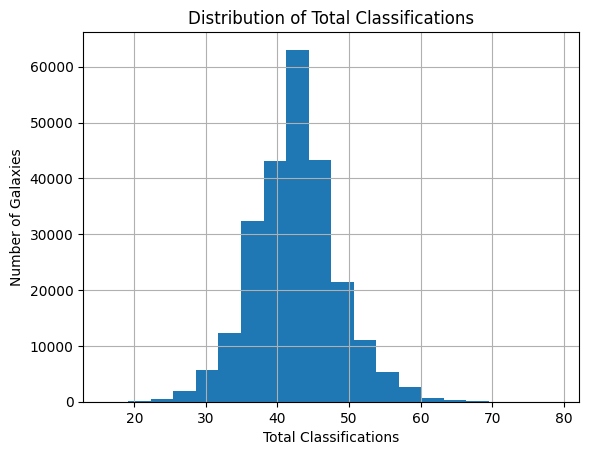

In [44]:
df_selected['total_classifications'].hist(bins=20)
plt.xlabel('Total Classifications')
plt.ylabel('Number of Galaxies')
plt.title('Distribution of Total Classifications')
plt.show()

total classifications mean number of times a person classified or voted on that specific galaxy

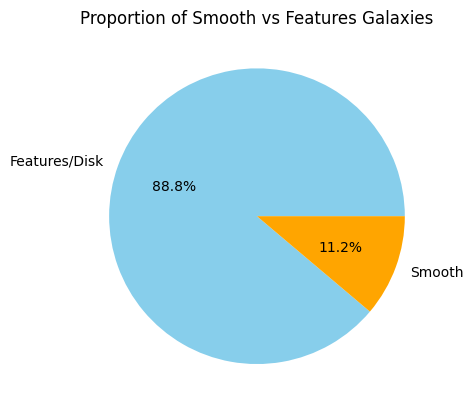

In [45]:
# 0 = Features/disk, 1 = Smooth
counts = df["t01_smooth_or_features_a01_smooth_flag"].value_counts()

# map numeric flags to labels
counts.index = counts.index.map({1: "Smooth", 0: "Features/Disk"})

# pie chart
counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.ylabel('')
plt.title('Proportion of Smooth vs Features Galaxies')
plt.show()




*   Total galaxies: 243,500
*   Most common class: Eliptical (42.5%)
*   Sperical galaxies: 38.7%
*   Barred spericals: 8.7%
*   Irregular/odd: 9.8%








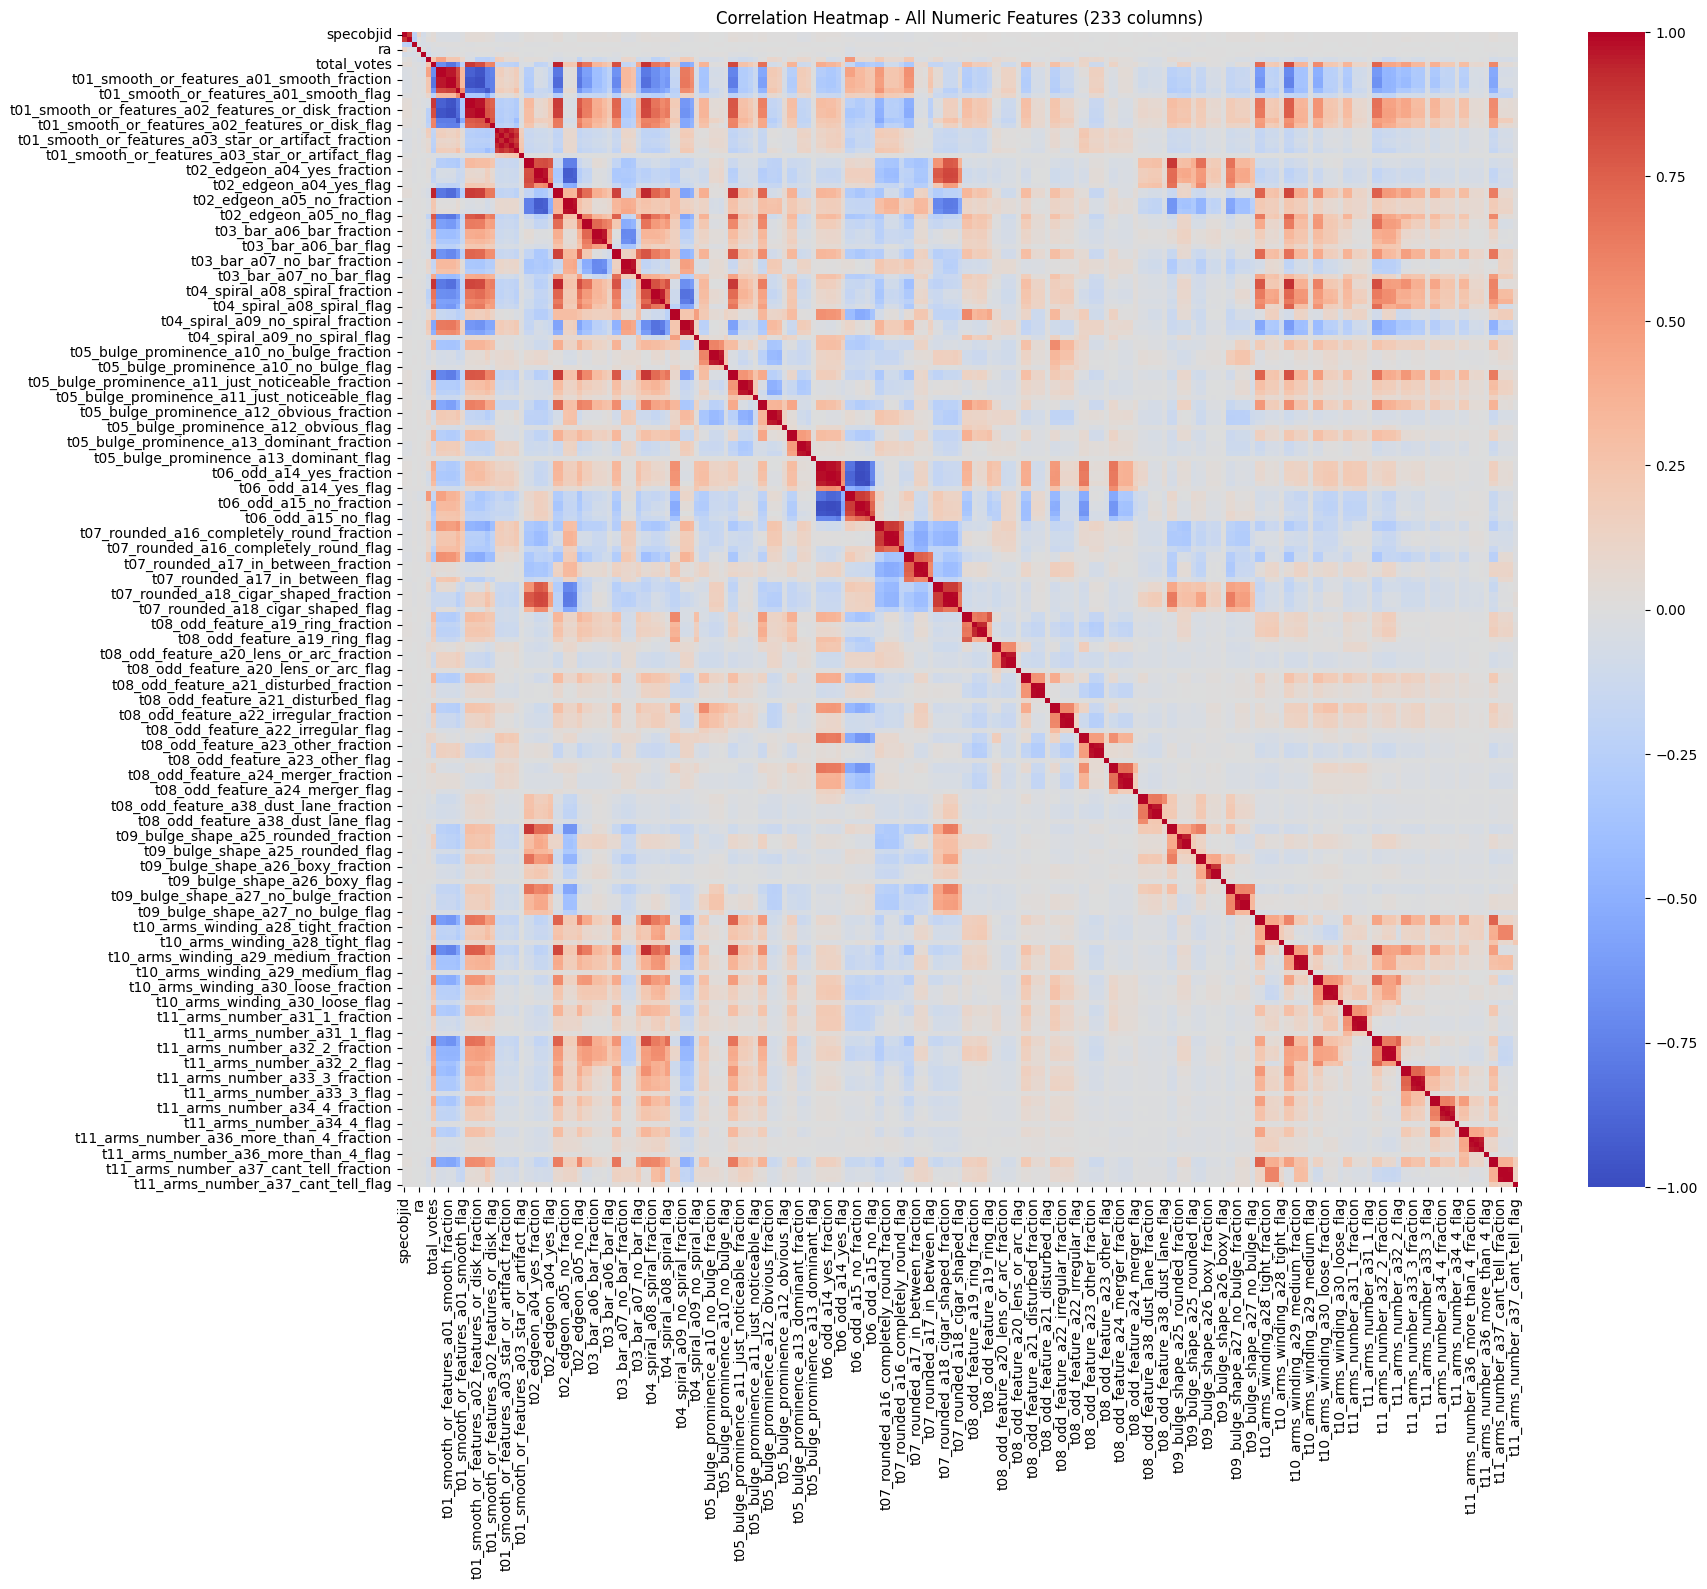

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# compute correlation matrix
corr = numeric_df.corr()

# visualize
plt.figure(figsize=(18, 15))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - All Numeric Features (233 columns)')
plt.show()


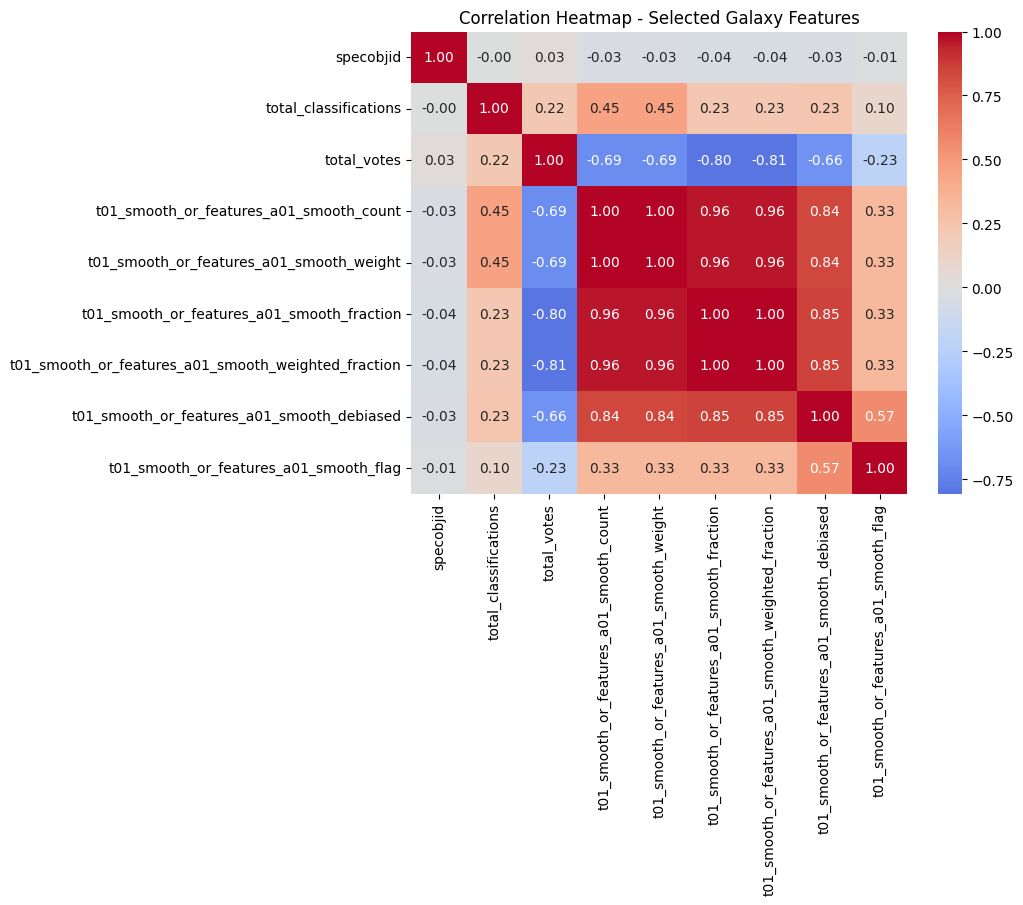

In [47]:
numeric_df_selected = df_selected.select_dtypes(include=['float64', 'int64'])

corr_selected = numeric_df_selected.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_selected, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap - Selected Galaxy Features')
plt.show()
